In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#for attributes we don't use () like columns but for built in functions we use () like head()
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
data.shape

(768, 9)

#missing values can be in the form of 
# 1. NaN (Not a Number)
# 2. Null
# 3. Blank values
# 4. Columns having missing data indicated by 0's

In [11]:
data.info()
#768 rows having 768 non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
data.isna() #check if any null values in dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [13]:
data.isna().any() #it checks each column with the isna() function to look for any non-null value

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [14]:
data.isna().sum() #gives the sum of null values per column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Howevee, since we have continuous data there might be the case that 0's might stand for missing data. Let's check that

In [15]:
data.describe()
"it is not possible for to have minimum value to be zero for Glucose, BloodPressure, SkinThickness, Insulin. Thus in the above same rows" 
"we have missing values"

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The 0's in these columns should be replaced by median values, since it is the least affected by outliers.

In [18]:
data["Glucose"]

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [28]:
# Replacing the 0's with NaN
from numpy import nan

data["Glucose"] = data["Glucose"].replace(0,np.nan)

In [20]:
data['SkinThickness'] = data["SkinThickness"].replace(0,np.nan)
data["BloodPressure"] = data["BloodPressure"].replace(0,np.nan)
data["Insulin"] = data["Insulin"].replace(0,np.nan)
data["BMI"] = data["BMI"].replace(0,np.nan)

After the replacing the 0's with Nan, let's now check our dataset

In [29]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLucose
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,148.0
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,85.0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,183.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0


In [30]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLucose
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000,763.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958,121.686763
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951,30.535641
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,44.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000,99.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000,117.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000,141.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,199.000000


In [32]:
#count of Nan values in dataset
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
GLucose                       5
dtype: int64

As inferred for SkinThickness and Insulin have very high amount of missing data, since removing these records from the dataset wll result in an informative loss, thus it is not advisable to do so. Hence we will impute these missing values with the median of their respective columns since median is least affected by outliers


In [33]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
GLucose                     117.0000
dtype: float64

In [34]:
#inputing missing values with theird respective median value
data.fillna(data.median(), inplace=True)

In [35]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLucose
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,148.0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,85.0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,183.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0


In [36]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLucose
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958,121.656250
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951,30.438286
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,44.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000,99.750000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000,117.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,140.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,199.000000


In [37]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
GLucose                     0
dtype: int64

OUTLIER DETECTION AND TREATMENT
- Outliers are extreme values that deviate from the observation on data, they may indicate a variability in measurement or experimental errors
- Boxplot are a great way to detect outliers. Once the outliers are detected, they can be imputed with the 5th and the 95th percentile

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

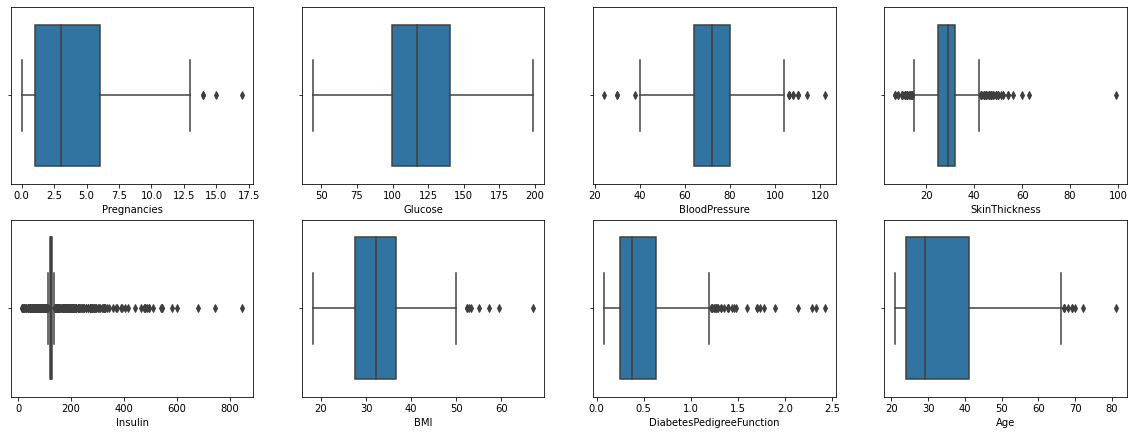

In [39]:
#outlier detection using boxplots
plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(data["Pregnancies"])

plt.subplot(4,4,2)
sns.boxplot(data["Glucose"])

plt.subplot(4,4,3)
sns.boxplot(data["BloodPressure"])

plt.subplot(4,4,4)
sns.boxplot(data["SkinThickness"])

plt.subplot(4,4,5)
sns.boxplot(data["Insulin"])

plt.subplot(4,4,6)
sns.boxplot(data["BMI"])

plt.subplot(4,4,7)
sns.boxplot(data["DiabetesPedigreeFunction"])

plt.subplot(4,4,8)
sns.boxplot(data["Age"])

In [47]:
#now comes the time to quantile the data to the 5th and 95th percentile
data["Pregnancies"] = data["Pregnancies"].clip(lower=data["Pregnancies"].quantile(0.05), upper = data["Pregnancies"].quantile(0.95))

In [48]:
data["BloodPressure"] = data["BloodPressure"].clip(lower=data["BloodPressure"].quantile(0.05), upper = data["BloodPressure"].quantile(0.95))

In [49]:
data["SkinThickness"] = data["SkinThickness"].clip(lower=data["SkinThickness"].quantile(0.05), upper = data["SkinThickness"].quantile(0.95))

In [50]:
data["Insulin"] = data["Insulin"].clip(lower=data["Insulin"].quantile(0.05), upper = data["Insulin"].quantile(0.95))

In [51]:
data["BMI"] = data["BMI"].clip(lower=data["BMI"].quantile(0.05), upper = data["BMI"].quantile(0.95))

In [52]:
data["DiabetesPedigreeFunction"] = data["DiabetesPedigreeFunction"].clip(lower=data["DiabetesPedigreeFunction"].quantile(0.05), upper = data["DiabetesPedigreeFunction"].quantile(0.95))

In [53]:
data["Age"] = data["Age"].clip(lower=data["Age"].quantile(0.05), upper = data["Age"].quantile(0.95))

Let's visualize the boxplots after imputing the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

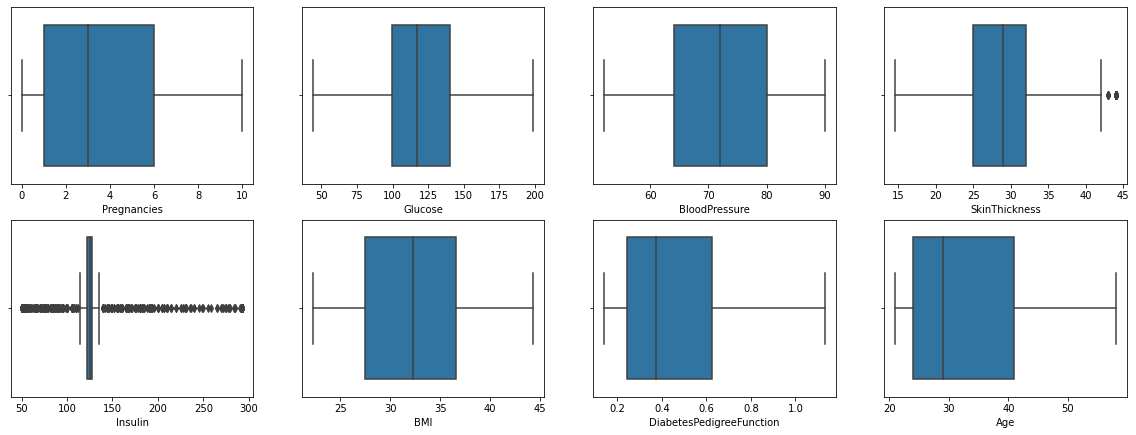

In [56]:
#outlier detection using boxplots after imputed by lower and upper limits
plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(data["Pregnancies"])

plt.subplot(4,4,2)
sns.boxplot(data["Glucose"])

plt.subplot(4,4,3)
sns.boxplot(data["BloodPressure"])

plt.subplot(4,4,4)
sns.boxplot(data["SkinThickness"])

plt.subplot(4,4,5)
sns.boxplot(data["Insulin"])

plt.subplot(4,4,6)
sns.boxplot(data["BMI"])

plt.subplot(4,4,7)
sns.boxplot(data["DiabetesPedigreeFunction"])

plt.subplot(4,4,8)
sns.boxplot(data["Age"])

In [62]:
#As we see there is still some outliers in Insulin and SkinThickness column so let's try manipulating the percentile values
data["Insulin"] = data["Insulin"].clip(lower=data["Insulin"].quantile(0.25), upper=data["Insulin"].quantile(0.75)) 

In [61]:
data["SkinThickness"] = data["SkinThickness"].clip(lower=data["SkinThickness"].quantile(0.07), upper=data["SkinThickness"].quantile(0.93))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


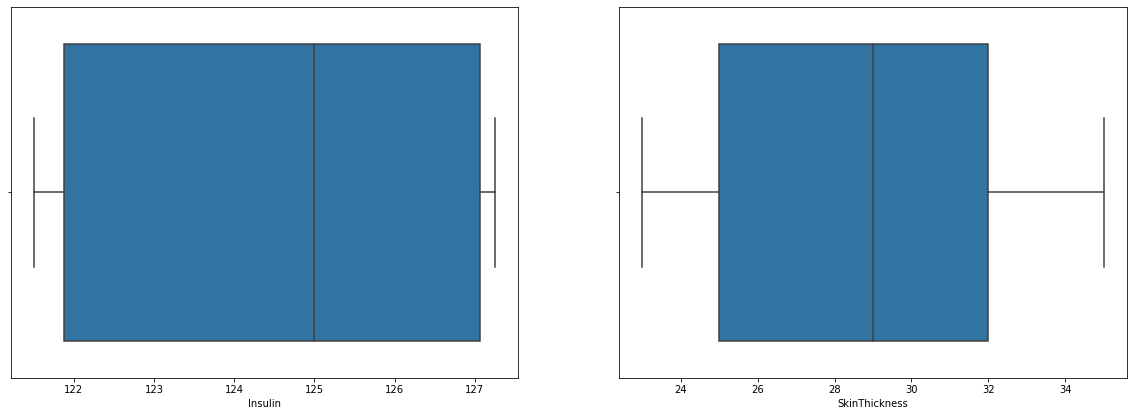

In [65]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
sns.boxplot(data["Insulin"])

plt.subplot(2,2,2)
sns.boxplot(data["SkinThickness"])

The outliers of Skin Thickness were treated with minor changes in the percentiles but the outlines of insulin required a major change in the percentiles. This might result in too much data manipulation which might jeopardise the models.
Attribute Insulin might have to be removed from the dataset. 

# **Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


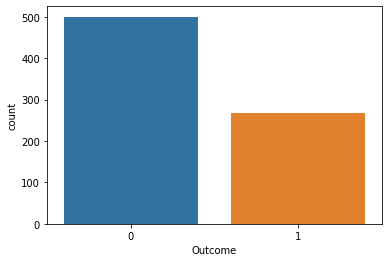

In [66]:
#this curve shows non-diabetic {0} vs Diabetic {1}
sns.countplot(data["Outcome"])

Let's get a percentage distribution of diabetic vs non-diabetic people

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


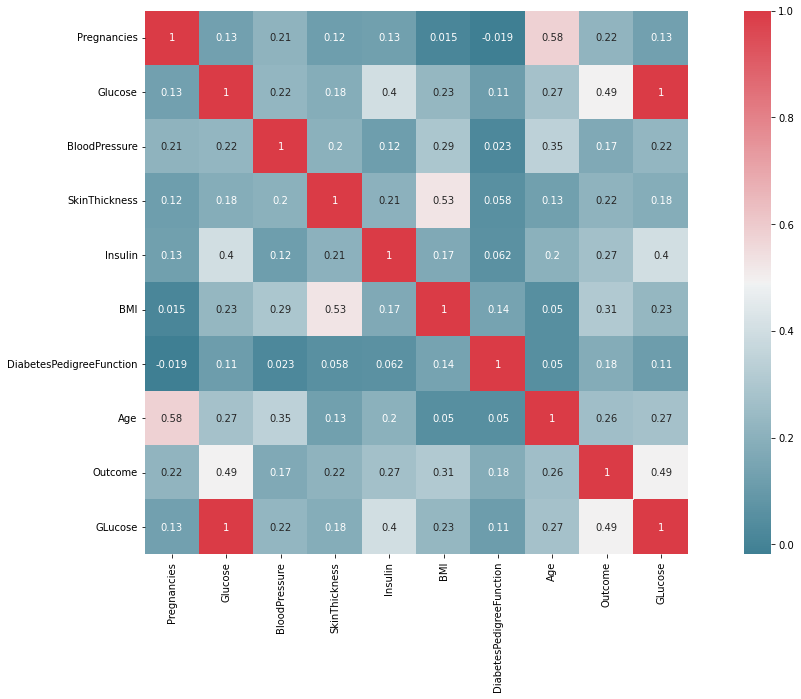

In [71]:
#Let's check for multi-colinearity between the column values (Multi Colinearity means several independent variables having corelation 
#among each other)
f, ax = plt.subplots(figsize = (20,10))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True), square=True, ax=ax,annot=True)


From the above corr plot we can deduce that there is no multi-colinearity in the data set
The correlation plot shows the following relation between the parameters

1. Glucose, Age, BMI, Pregnancies are the most correlated paramters with the Outcome
2. Insulin and DiabetesPedigreeFunction have little correlation with Outcome
3. BloodPressure and SkinThickness have tiny correlations with the outcome.
4. If there were multi-colinearity in the dataset, we can draw a histogram for the respective two variables which show colinearity.